In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("../../")

from experiment import Exp

from dataloaders import data_set,data_dict
import torch
import yaml
import os

# 参数设置

# 训练参数 
除了路径 其他不要变

In [2]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

args = dotdict()   
# TODO change the path as relative path
args.to_save_path     = "../../../ISWC2022LearnableFilter/Run_logs"              
args.freq_save_path   = "../../../ISWC2022LearnableFilter/Freq_data"
args.window_save_path = "../../../ISWC2022LearnableFilter/Sliding_window"
args.root_path        = "../../../datasets"


args.drop_transition  = False
args.datanorm_type    = "standardization" # None ,"standardization", "minmax"


args.batch_size       = 256                                                     
args.shuffle          = True
args.drop_last        = False
args.train_vali_quote = 0.90                                           


# training setting 
args.train_epochs            = 150

args.learning_rate           = 0.001  
args.learning_rate_patience  = 5
args.learning_rate_factor    = 0.1


args.early_stop_patience     = 15

args.use_gpu                 = True if torch.cuda.is_available() else False
args.gpu                     = 2
args.use_multi_gpu           = False

args.optimizer               = "Adam"
args.criterion               = "CrossEntropy"

## 数据参数



In [3]:
args.data_name                        =  "oppo"

args.wavelet_filtering                = True
args.wavelet_filtering_regularization = True
args.wavelet_filtering_finetuning     = True
args.wavelet_filtering_finetuning_percent = 1
args.wavelet_filtering_learnable      = False
args.wavelet_filtering_layernorm      = False

args.regulatization_tradeoff          = 0
args.number_wavelet_filtering         = 10


args.difference       = False 
args.filtering        =  False
args.magnitude        =  False
args.weighted_sampler = False




args.pos_select       = None
args.sensor_select    = None


args.representation_type = "time"
args.exp_mode            = "LOCV"
if args.data_name      ==  "skodar":
    args.exp_mode            = "SOCV"

config_file = open('../../configs/data.yaml', mode='r')
data_config = yaml.load(config_file, Loader=yaml.FullLoader)
config = data_config[args.data_name]

args.root_path       = os.path.join(args.root_path,config["filename"])
args.sampling_freq   = config["sampling_freq"]
args.num_classes     =  config["num_classes"]
window_seconds       = config["window_seconds"]
args.windowsize      =   int(window_seconds * args.sampling_freq) 
args.input_length    =  args.windowsize
# input information
args.c_in            = config["num_channels"]



if args.difference:
    args.c_in = args.c_in*2
    
    
if args.wavelet_filtering :
    
    if args.windowsize%2==1:
        N_ds = int(torch.log2(torch.tensor(args.windowsize-1)).floor()) - 2
    else:
        N_ds = int(torch.log2(torch.tensor(args.windowsize)).floor()) - 2

    args.f_in            =  args.number_wavelet_filtering*N_ds+1
else:
    args.f_in            =  1



## 模型参数

In [4]:
args.filter_scaling_factor = 0.75
args.model_type              = "deepconvlstm"#"tinyhar"#"sahar" #"deepconvlstm"

# args.cross_channel_interaction_type = "attn"
# args.cross_channel_aggregation_type = "filter"
# args.temporal_info_interaction_type
# args.temporal_info_aggregation_type

# 实验

Use GPU: cuda:2
clone the  wavefiler weight
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Done!
Parameter : 1498455
Set the seed as :  1
 ----------------------- load all the data -------------------
-----------------------Sliding file are generated -----------------------
-----------------------Sliding file are generated -----------------------
================ LOCV Mode ====================
================ 4 CV ======================
================ the 0 th CV Experiment ================ 
Leave one Out Experiment : The 1 Part as the test
[-] Target sampling weights:  [3.63609919e-05 1.66666667e-03 1.60513644e-03 1.76991150e-03
 1.71232877e-03 1.18343195e-03 1.36054422e-03 1.83486239e-03
 2.02020202e-03 2.66666667e-03 3.18471338e-03 3.11526480e-03
 3.48432056e-03 2.46913580e-03 2.53164557e-03 1.26103405e-03
 4.58295142e-04 2.02429150e-03]
Train data number :  38060
The number of classes is :  18
The input_length  is :  30
The channel_in is :  77
Validation data num

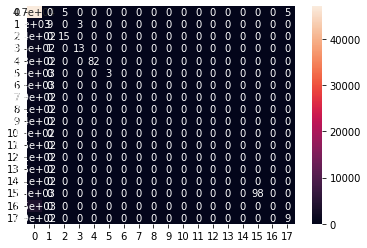

In [5]:
for seed in [1,2,3,4,5]:
    args.seed = seed
    exp = Exp(args)
    exp.train()